In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('G:/SEM 5/mini-project/dataset-new/all_data1.csv', header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AM_SE         350 non-null    int64  
 1   AM_IA         350 non-null    int64  
 2   DLDA_SE       350 non-null    int64  
 3   DLDA_IA       350 non-null    int64  
 4   DSGT_SE       350 non-null    int64  
 5   DSGT_IA       350 non-null    int64  
 6   ECCF_SE       350 non-null    int64  
 7   ECCF_IA       350 non-null    int64  
 8   DS_SE         350 non-null    int64  
 9   DS_IA         350 non-null    int64  
 10  DigitalSL_TW  350 non-null    int64  
 11  DSL_OP        350 non-null    int64  
 12  BE_TW         350 non-null    int64  
 13  BE_OP         350 non-null    int64  
 14  DataSL_TW     350 non-null    int64  
 15  DSL_OP.1      350 non-null    int64  
 16  OOPM_TW       350 non-null    int64  
 17  OOPM_OP       350 non-null    int64  
 18  GPA_SEMIII    350 non-null    

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = df['GPA_SEMIII'].values
y
X = df.values
X = np.delete(X,18,axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)


0.5699506165140729

## k-means 

In [8]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
# elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

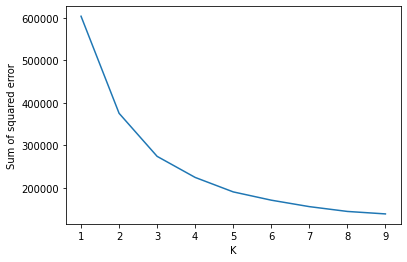

In [10]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [11]:
score = np.array(sse)
diff_scores = score / score[0]
diff_scores = np.diff(diff_scores)
n_clusters = np.argwhere(diff_scores < np.quantile(diff_scores, 0.9))[-1][0]
print(n_clusters)

6


In [12]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(X)
y_predicted

array([0, 0, 2, 4, 1, 4, 0, 0, 4, 1, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1,
       4, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 2, 4, 0, 4, 1, 2, 1, 4, 1, 4, 1,
       1, 2, 0, 1, 1, 1, 4, 2, 1, 4, 1, 0, 1, 1, 4, 4, 4, 2, 1, 1, 1, 0,
       4, 4, 1, 1, 5, 0, 1, 4, 1, 4, 4, 4, 1, 4, 1, 0, 0, 1, 1, 1, 1, 4,
       4, 1, 0, 1, 1, 4, 1, 4, 2, 4, 1, 2, 1, 1, 4, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 3, 0, 4, 4, 1, 2, 4, 2, 1, 0, 1, 0, 0, 4, 0, 0, 4, 4,
       4, 4, 0, 4, 0, 4, 0, 1, 4, 4, 0, 0, 0, 4, 0, 0, 1, 1, 0, 4, 4, 0,
       1, 1, 1, 1, 4, 1, 1, 1, 2, 4, 2, 0, 1, 1, 4, 2, 4, 2, 1, 0, 4, 4,
       4, 1, 2, 0, 0, 4, 0, 2, 4, 0, 4, 1, 0, 2, 4, 1, 1, 1, 1, 1, 0, 1,
       4, 0, 4, 1, 1, 4, 0, 1, 2, 2, 2, 2, 4, 1, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 4, 4, 0, 2, 4, 4, 1, 4,
       1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 2, 4, 4, 1, 0, 0, 0, 4,
       0, 4, 0, 4, 0, 1, 4, 4, 4, 0, 1, 4, 4, 0, 4, 1, 4, 4, 2, 2, 4, 4,
       4, 0, 0, 1, 0, 4, 0, 4, 4, 0, 0, 0, 1, 0, 0,

In [13]:
df['cluster']=y_predicted
df.head()
df.to_csv("cluster.csv")

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
# df7 = df[df.cluster==6]
# df8 = df[df.cluster==7]
# df9 = df[df.cluster==8]
# df10 = df[df.cluster==9]
# df11 = df[df.cluster==10]
# df12 = df[df.cluster==11]
# df13 = df[df.cluster==12]
# df14 = df[df.cluster==13]
# df15 = df[df.cluster==14]
# df16 = df[df.cluster==15]
# df17 = df[df.cluster==16]

In [15]:
df1.to_csv("cluster0_6.csv")
df2.to_csv("cluster1_6.csv")
df3.to_csv("cluster2_6.csv")
df4.to_csv("cluster3_6.csv")
df5.to_csv("cluster4_6.csv")
df6.to_csv("cluster5_6.csv")
# df7.to_csv("cluster6.csv")
# df8.to_csv("cluster7.csv")
# df9.to_csv("cluster8.csv")
# df10.to_csv("cluster9.csv")
# df11.to_csv("cluster10.csv")
# df12.to_csv("cluster11.csv")
# df13.to_csv("cluster12.csv")
# df14.to_csv("cluster13.csv")
# df15.to_csv("cluster14.csv")
# df16.to_csv("cluster15.csv")
# df17.to_csv("cluster16.csv")

In [16]:
df1.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA_SEMIII,cluster
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0
mean,69.243590,17.423077,65.717949,15.346154,67.551282,17.884615,61.961538,15.641026,58.641026,16.871795,22.384615,21.153846,21.987179,21.128205,23.089744,21.564103,44.756410,45.282051,9.417692,0.0
std,6.982698,2.206950,6.077203,2.295263,7.235639,1.967138,6.257343,2.832897,7.248778,2.134193,1.767166,1.477774,1.819759,1.909368,1.107072,2.541038,2.702504,2.657493,0.397727,0.0
min,44.000000,11.000000,45.000000,9.000000,45.000000,13.000000,50.000000,9.000000,39.000000,11.000000,18.000000,18.000000,16.000000,18.000000,20.000000,13.000000,38.000000,38.000000,8.620000,0.0
25%,64.250000,16.250000,61.000000,14.000000,65.000000,17.000000,56.000000,13.000000,53.250000,15.250000,21.000000,20.000000,21.000000,20.000000,23.000000,20.000000,42.250000,44.000000,9.137500,0.0
50%,69.000000,18.000000,66.000000,16.000000,69.500000,18.000000,62.500000,16.000000,59.000000,17.000000,23.000000,21.000000,22.000000,21.000000,23.000000,22.500000,45.000000,46.000000,9.440000,0.0
75%,75.000000,19.000000,70.000000,17.000000,72.000000,19.000000,67.750000,18.000000,65.000000,19.000000,24.000000,22.000000,23.000000,22.000000,24.000000,24.000000,47.000000,48.000000,9.690000,0.0
max,80.000000,20.000000,78.000000,19.000000,79.000000,20.000000,75.000000,20.000000,70.000000,20.000000,24.000000,24.000000,24.000000,32.000000,24.000000,24.000000,49.000000,49.000000,10.000000,0.0


In [17]:
df2.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA_SEMIII,cluster
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0
mean,46.744898,11.244898,42.173469,11.040816,44.622449,14.806122,38.091837,11.061224,39.897959,13.102041,20.102041,19.744898,19.724490,19.642857,21.132653,19.510204,41.459184,42.214286,5.835306,1.0
std,11.972745,2.604759,8.843456,2.820830,8.251854,2.838099,8.629949,2.635274,8.423690,2.895036,2.665123,2.569894,2.367219,2.174121,2.291345,3.728533,4.179401,4.529969,2.256439,0.0
min,19.000000,4.000000,24.000000,4.000000,27.000000,8.000000,4.000000,4.000000,17.000000,7.000000,11.000000,13.000000,13.000000,12.000000,14.000000,0.000000,25.000000,29.000000,0.000000,1.0
25%,36.000000,9.000000,36.000000,9.000000,39.000000,13.000000,33.000000,9.000000,34.000000,11.000000,18.000000,18.000000,18.250000,19.000000,20.000000,18.000000,39.000000,39.000000,5.930000,1.0
50%,46.000000,11.000000,40.000000,11.000000,43.500000,15.000000,36.500000,11.000000,40.000000,13.000000,20.000000,20.000000,20.000000,20.000000,22.000000,20.000000,42.000000,44.000000,6.560000,1.0
75%,55.000000,13.000000,46.750000,13.000000,50.000000,17.000000,44.000000,13.000000,46.000000,15.000000,22.000000,21.750000,21.000000,21.000000,23.000000,22.000000,44.750000,46.000000,6.990000,1.0
max,74.000000,17.000000,67.000000,18.000000,68.000000,20.000000,57.000000,16.000000,63.000000,19.000000,24.000000,24.000000,24.000000,23.000000,24.000000,24.000000,48.000000,48.000000,8.810000,1.0


In [18]:
df3.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA_SEMIII,cluster
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,23.626866,8.835821,26.716418,9.417910,34.238806,11.328358,30.283582,9.671642,29.552239,11.044776,17.567164,16.865672,19.074627,18.522388,18.895522,17.402985,39.537313,39.925373,0.872537,2.0
std,11.079377,3.305629,9.699744,2.965198,9.672030,2.814401,11.094369,2.433280,9.756557,2.852074,3.858182,3.424048,2.271786,3.858710,3.060671,4.905346,5.950117,5.755928,1.990613,0.0
min,0.000000,0.000000,6.000000,3.000000,5.000000,5.000000,2.000000,3.000000,2.000000,4.000000,11.000000,12.000000,14.000000,0.000000,12.000000,0.000000,25.000000,26.000000,0.000000,2.0
25%,16.000000,8.000000,18.500000,8.000000,32.000000,9.000000,21.000000,8.000000,22.500000,9.000000,14.000000,13.500000,18.000000,17.000000,17.000000,14.000000,36.000000,35.000000,0.000000,2.0
50%,21.000000,9.000000,32.000000,10.000000,34.000000,11.000000,32.000000,10.000000,32.000000,11.000000,18.000000,17.000000,20.000000,20.000000,20.000000,17.000000,41.000000,42.000000,0.000000,2.0
75%,32.000000,11.000000,32.000000,11.000000,39.000000,13.000000,34.500000,11.000000,34.000000,13.000000,21.500000,20.000000,20.000000,20.000000,21.000000,21.500000,44.000000,45.000000,0.000000,2.0
max,51.000000,16.000000,44.000000,15.000000,62.000000,18.000000,59.000000,17.000000,55.000000,16.000000,24.000000,23.000000,24.000000,22.000000,23.000000,24.000000,48.000000,48.000000,5.960000,2.0


In [19]:
df4.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA_SEMIII,cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,377.0,10.0,25.0,10.0,32.0,11.0,33.0,14.0,33.0,9.0,17.0,19.0,20.0,21.0,23.0,20.0,43.0,46.0,0.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,377.0,10.0,25.0,10.0,32.0,11.0,33.0,14.0,33.0,9.0,17.0,19.0,20.0,21.0,23.0,20.0,43.0,46.0,0.0,3.0
25%,377.0,10.0,25.0,10.0,32.0,11.0,33.0,14.0,33.0,9.0,17.0,19.0,20.0,21.0,23.0,20.0,43.0,46.0,0.0,3.0
50%,377.0,10.0,25.0,10.0,32.0,11.0,33.0,14.0,33.0,9.0,17.0,19.0,20.0,21.0,23.0,20.0,43.0,46.0,0.0,3.0
75%,377.0,10.0,25.0,10.0,32.0,11.0,33.0,14.0,33.0,9.0,17.0,19.0,20.0,21.0,23.0,20.0,43.0,46.0,0.0,3.0
max,377.0,10.0,25.0,10.0,32.0,11.0,33.0,14.0,33.0,9.0,17.0,19.0,20.0,21.0,23.0,20.0,43.0,46.0,0.0,3.0


In [20]:
df5.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA_SEMIII,cluster
count,105.000000,105.00000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0
mean,58.609524,14.80000,55.066667,13.038095,55.923810,16.580952,49.733333,13.400000,51.590476,15.514286,21.523810,20.676190,20.733333,20.419048,22.400000,20.647619,43.285714,42.980952,8.107429,4.0
std,10.568909,2.67251,7.759940,2.845117,7.941729,2.506840,7.921813,2.633366,8.593037,2.488876,2.014826,1.773172,1.777350,1.864553,1.497434,2.571968,3.018259,3.907539,0.480913,0.0
min,32.000000,9.00000,32.000000,8.000000,34.000000,9.000000,32.000000,7.000000,26.000000,10.000000,16.000000,13.000000,16.000000,16.000000,16.000000,13.000000,34.000000,33.000000,7.000000,4.0
25%,52.000000,13.00000,51.000000,11.000000,50.000000,15.000000,44.000000,11.000000,46.000000,14.000000,20.000000,20.000000,20.000000,19.000000,22.000000,19.000000,41.000000,40.000000,7.730000,4.0
50%,60.000000,14.00000,56.000000,13.000000,56.000000,17.000000,51.000000,13.000000,53.000000,16.000000,22.000000,21.000000,21.000000,21.000000,23.000000,21.000000,44.000000,44.000000,8.120000,4.0
75%,67.000000,17.00000,60.000000,15.000000,60.000000,18.000000,55.000000,16.000000,58.000000,17.000000,23.000000,22.000000,22.000000,22.000000,23.000000,23.000000,45.000000,46.000000,8.460000,4.0
max,78.000000,20.00000,75.000000,20.000000,73.000000,20.000000,65.000000,19.000000,68.000000,20.000000,24.000000,24.000000,24.000000,23.000000,24.000000,24.000000,49.000000,48.000000,9.230000,4.0


In [21]:
df6.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA_SEMIII,cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
mean,56.0,11.0,36.0,18.0,61.0,20.0,46.0,11.0,52.0,199.0,22.0,21.0,20.0,22.0,22.0,24.0,46.0,47.0,7.88,5.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,56.0,11.0,36.0,18.0,61.0,20.0,46.0,11.0,52.0,199.0,22.0,21.0,20.0,22.0,22.0,24.0,46.0,47.0,7.88,5.0
25%,56.0,11.0,36.0,18.0,61.0,20.0,46.0,11.0,52.0,199.0,22.0,21.0,20.0,22.0,22.0,24.0,46.0,47.0,7.88,5.0
50%,56.0,11.0,36.0,18.0,61.0,20.0,46.0,11.0,52.0,199.0,22.0,21.0,20.0,22.0,22.0,24.0,46.0,47.0,7.88,5.0
75%,56.0,11.0,36.0,18.0,61.0,20.0,46.0,11.0,52.0,199.0,22.0,21.0,20.0,22.0,22.0,24.0,46.0,47.0,7.88,5.0
max,56.0,11.0,36.0,18.0,61.0,20.0,46.0,11.0,52.0,199.0,22.0,21.0,20.0,22.0,22.0,24.0,46.0,47.0,7.88,5.0


In [22]:
df7.describe()

NameError: name 'df7' is not defined

In [ ]:
df8.describe()

In [ ]:
df9.describe()

In [ ]:
df10.describe()

In [ ]:
df11.describe()

In [ ]:
df12.describe()

In [ ]:
df13.describe()

In [ ]:
df14.describe()

In [ ]:
df15.describe()

In [ ]:
df16.describe()

In [ ]:
df17.describe()